Features Shape (1000, 3)
Accuracy of classifer (batch -- all data points):
0.968
Done! 
Number of iterations: 100000


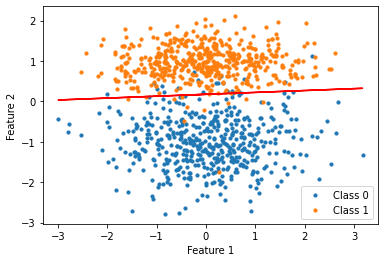

In [12]:
'''
  ML Assignment - Questions 1 and 3
  
  As question 3 is the same as qeustion 1.b but with different data, 
  I have included a comment that you should uncomment to get the results of
  the dataset provided in question 3.
'''

import numpy as np
import math
import random
import sklearn
from sklearn.datasets import make_regression 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def calculate_sigmoid(X, theta):
  z = np.dot(X, theta) # theta_transpose * X
  return 1 / (1 + np.exp(-z))

def gradient(X, h, y):
  grad = np.dot(X.T, (y - h)) / y.shape[0]
  return grad

def gradient_stochastic(X_i, h, y_i):
  grad = np.dot(X_i.T, (y_i - h))
  return grad

def train_model_batch(X, y, alpha, max_iter=10000):
  # theta = np.zeros(X.shape[1]) # initial theta
  theta = np.random.random(X.shape[1]) # initial theta
  
  converged = False
  iter = 0

  while not converged:
    hypothesis = calculate_sigmoid(X, theta)
    calculated_gradient = gradient(X, hypothesis, y)
    theta = theta + alpha * calculated_gradient

    iter += 1

    if (iter >= max_iter):
      converged = True
  
  return theta

def train_model_stochastic(X, y, alpha, max_iter=10000):
  # theta = np.zeros(X.shape[1]) # initial theta
  theta = np.random.random(X.shape[1]) # initial theta

  converged = False
  iter = 0

  while not converged:
    random_index = np.random.randint(0, X.shape[0])
    X_i = X[random_index]
    y_i = y[random_index]
    hypothesis = calculate_sigmoid(X_i.T, theta)
    calculated_gradient = gradient_stochastic(X_i, hypothesis, y_i)

    theta = theta + alpha * calculated_gradient

    iter += 1

    if (iter >= max_iter):
      converged = True
  
  return theta

def train_model_sklearn(X, y, X_test):
  clf = LogisticRegression(fit_intercept=True, penalty="none", max_iter=100000)
  clf.fit(X, y)
  clf_result = clf.predict(X_test)

  return clf_result

def predict_model(X, y, theta):
  y_predict = calculate_sigmoid(X, theta)
  learned_model = np.around(y_predict, decimals=6)
  
  model_dataframe = pd.DataFrame()
  model_dataframe["predicted"] = learned_model
  model_dataframe['target'] = y
  model_dataframe['predicted'] = model_dataframe['predicted'].apply(lambda x : 0 if x < 0.5 else 1)
  # accuracy = model_dataframe.loc[model_dataframe['predicted'] == model_dataframe['target']].shape[0] / model_dataframe.shape[0] * 100

  return model_dataframe['predicted']

def get_data(data_url):
  data = pd.read_csv(data_url)
  X = data.to_numpy()[:, :-1]
  y = data.to_numpy()[:, -1]

  return X, y

if __name__ == '__main__':
    '''
      -- Common
      Generate data points here (either using `make_classification` or an external data file)
    '''
    features_matrix, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=0)
    
    '''
      For Question 3, you just need to uncomment the next line
    '''
    # features_matrix, y = get_data("https://raw.githubusercontent.com/waleed-alfaifi/ml-assignment/main/data.csv")

    '''
      -- Common
      Choose the learning rate
      Choose the max iterations number
    '''
    alpha = 0.1 # learning rate
    max_iter=100000

    '''
      -- Common
      Prepate the data points (by adding intercept) and dividing it for the 80/20 training method
    '''
    intercept = np.ones((features_matrix.shape[0], 1)) # feature x0 which is always 1
    features_matrix = np.concatenate((intercept, features_matrix), axis=1) # features matrix now look like (x0 x1 x2)
    X_train, X_test, y_train, y_test = train_test_split(features_matrix, y, test_size=0.20) # 80% training and 20% test

    print("Features Shape", features_matrix.shape)

    '''
      -- Question 1 - Part a --
      Train your model using all data points, 
      and plot the data points using different colors for different classes
    '''
    # sk_model = train_model_sklearn(features_matrix, y, features_matrix)
    # print("Accuracy of Sklearn Built-in Classifer")
    # print(metrics.accuracy_score(y, sk_model))

    # Using BGD
    theta = train_model_batch(features_matrix, y, alpha, max_iter)
    predicted_model = predict_model(features_matrix, y, theta)
    print("Accuracy of classifer (batch -- all data points):")
    print(metrics.accuracy_score(y, predicted_model))

    # Using SGD
    # theta = train_model_stochastic(features_matrix, y, alpha, max_iter)
    # predicted_model = predict_model(features_matrix, y, theta)
    # print("Accuracy of classifer (stochastic -- all data points):")
    # print(metrics.accuracy_score(y, predicted_model))

    '''
      -- Question 1 - Part b --
      Divide the data point into training data (80%) and test data (20%) randomly. 
      Train your model (using both batch and stochastic gradient ascent) 
      using the training data, 
      and measure their classification performances using the following metrics
        i.	Accuracy
        ii.	F1 score 
        iii.	Sensitivity
        iv.	Precision
    '''
    # print("Training Data Shape", X_train.shape)

    # Using Sklearn
    # sk_model = train_model_sklearn(X_train, y_train, X_test)
    # accuracy = metrics.accuracy_score(y_test, sk_model)
    # f1_score = metrics.f1_score(y_test, sk_model)
    # sensitivity = metrics.recall_score(y_test, sk_model)
    # precision_score = metrics.precision_score(y_test, sk_model)

    # print("Measures of Sklearn Built-in Classifer")
    # print(f"   1. Accuracy: {accuracy} \n   2. F1 Score: {f1_score}")
    # print(f"   3. Sensitivity: {sensitivity} \n   4. Precision Score: {f1_score}")

    # Using BGD
    # theta = train_model_batch(X_train, y_train, alpha, max_iter)
    # predicted_model = predict_model(X_test, y_test, theta)
    
    # ## Metrics
    # accuracy = metrics.accuracy_score(y_test, predicted_model)
    # f1_score = metrics.f1_score(y_test, predicted_model)
    # sensitivity = metrics.recall_score(y_test, predicted_model)
    # precision_score = metrics.precision_score(y_test, predicted_model)

    # print('Measures of classifier (batch -- 80/20 method):')
    # print(f"   1. Accuracy: {accuracy} \n   2. F1 Score: {f1_score}")
    # print(f"   3. Sensitivity: {sensitivity} \n   4. Precision Score: {f1_score}")

    # Using SGD
    # theta = train_model_stochastic(X_train, y_train, alpha, max_iter)
    # predicted_model = predict_model(X_test, y_test, theta)

    # ## Metrics
    # accuracy = metrics.accuracy_score(y_test, predicted_model)
    # f1_score = metrics.f1_score(y_test, predicted_model)
    # sensitivity = metrics.recall_score(y_test, predicted_model)
    # precision_score = metrics.precision_score(y_test, predicted_model)

    # print('Measures of classifier (stochastic -- 80/20 method):')
    # print(f"   1. Accuracy: {accuracy} \n   2. F1 Score: {f1_score}")
    # print(f"   3. Sensitivity: {sensitivity} \n   4. Precision Score: {f1_score}")

    '''
      -- Common
      Visualize 2-D data (works only when there are two features)
      Draw decision boundary for 2-D data (works only when there are two features)
    '''
    if (features_matrix.shape[1] == 3):
      plot_dataframe = pd.DataFrame(features_matrix, columns=["intercept", "feature1", "feature2"])
      plot_dataframe['y'] = y
      class0 = plot_dataframe.loc[plot_dataframe["y"] == 0]
      class1 = plot_dataframe.loc[plot_dataframe["y"] == 1]
      plt.scatter(class0["feature1"], class0['feature2'], s=10, label="Class 0")
      plt.scatter(class1['feature1'], class1['feature2'], s=10, label="Class 1")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.legend()

      x_values = plot_dataframe['feature1']
      y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
      plt.plot(x_values, y_values, label="Decision Boundary", color="red")
    
    print (f"Done! \nNumber of iterations: {max_iter}")

        

Weights: 
[-0.7889633509408989, -0.21997770440292316, 5.101525574651203]
----------------
Measures of Logsitic Classifer using Newtons Method:
   1. Accuracy: 0.966 
   2. F1 Score: 0.966403162055336
   3. Sensitivity: 0.978 
   4. Precision Score: 0.966403162055336


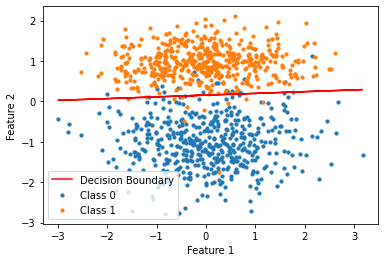

In [13]:
'''
  ML Assignment - Questions 2
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import metrics

if __name__ == '__main__':
  features_matrix, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=0)

  logistic = LogisticRegression(fit_intercept=True, solver="newton-cg")
  logistic.fit(features_matrix, y)
  predict = logistic.predict(features_matrix)

  theta = [logistic.intercept_[0], logistic.coef_[0][0], logistic.coef_[0][1]]
  print(f"Weights: \n{theta}")

  accuracy = metrics.accuracy_score(y, predict)
  f1_score = metrics.f1_score(y, predict)
  sensitivity = metrics.recall_score(y, predict)
  precision_score = metrics.precision_score(y, predict)

  print("----------------")
  
  print('Measures of Logsitic Classifer using Newtons Method:')
  print(f"   1. Accuracy: {accuracy} \n   2. F1 Score: {f1_score}")
  print(f"   3. Sensitivity: {sensitivity} \n   4. Precision Score: {f1_score}")

  plot_dataframe = pd.DataFrame(features_matrix, columns=["feature1", "feature2"])
  plot_dataframe['y'] = y
  class0 = plot_dataframe.loc[plot_dataframe["y"] == 0]
  class1 = plot_dataframe.loc[plot_dataframe["y"] == 1]
  plt.scatter(class0["feature1"], class0['feature2'], s=10, label="Class 0")
  plt.scatter(class1['feature1'], class1['feature2'], s=10, label="Class 1")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")

  x_values = plot_dataframe['feature1']
  y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
  plt.plot(x_values, y_values, label="Decision Boundary", color="red")

  plt.legend()
